#  Atividade 6 - Algoritmo Genético para TSP

**Alunos:** Luiz Henrique Oliveira Nascimento e Arthur Ângelo Gomes de Oliveira


Professor: Rodrigo Lira

---

Implementar um Algoritmo Genético para resolver o **Problema do Caixeiro Viajante (TSP)** desenvolvido na Atividade 5.

- População: 50 indivíduos
- Gerações: 400
- Seleção: Torneio (tamanho 3)
- Crossover: Order Crossover (OX) - taxa 90%
- Mutação: Swap - taxa 5%
- Elitismo: manter os 5 melhores para a próxima geração

##  Executar 30 vezes, em seguida:
1. Calcular a média e o desvio padrão da qualidade (fitness) das soluções finais encontradas
2. Gráfico de Convergência do AG (melhor fitness por iteração)
3. Criar boxplot com os resultados finais

##  1. Importando Bibliotecas

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import copy

print(' Bibliotecas importadas com sucesso!')

 Bibliotecas importadas com sucesso!


##  2. Código Base da Atividade 5

Funções básicas implementadas na Atividade 5:
- Matriz de distâncias USA13
- Gerar rota aleatória
- Calcular fitness (distância total)
- Validar rota

In [2]:
# Matriz de distâncias
USA13 = [
    [0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
    [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
    [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
    [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
    [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
    [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
    [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
    [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
    [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600],
    [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
    [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
    [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
    [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0],
]

# ==========================
# Rota
# ==========================
def gerar_rota(num_cidades: int) -> list[int]:
    """
    Gera uma rota aleatória válida (permuta todas as cidades,
    mas começa e termina na mesma cidade — aqui cidade 0).
    """
    cidades = list(range(1, num_cidades))  # ignora cidade 0 (fixa no início/fim)
    random.shuffle(cidades)
    rota = [0] + cidades + [0]  # começa e termina em 0
    return rota

# ==========================
# função fitness
# ==========================
def calcular_distancia_total(rota: list[int], matriz: list[list[int]]) -> int:
    """Calcula a distância total percorrida pela rota."""
    distancia = 0
    for i in range(len(rota) - 1):
        cidade_atual = rota[i]
        proxima_cidade = rota[i + 1]
        distancia += matriz[cidade_atual][proxima_cidade]
    return distancia

# ==========================
# validação
# ==========================
def rota_valida(rota: list[int], num_cidades: int) -> bool:
    """Verifica se a rota é válida: todas as cidades visitadas uma vez e volta à origem."""
    if rota[0] != rota[-1]:
        return False  # deve começar e terminar na mesma cidade
    cidades_intermediarias = rota[:-1]
    return sorted(set(cidades_intermediarias)) == list(range(num_cidades))

print(' Código da Atividade 5 carregado!')

# Teste
num_cidades = 13
rota_teste = gerar_rota(num_cidades)
print(f"\nRota gerada: {rota_teste}")
print(f"Rota válida? {rota_valida(rota_teste, num_cidades)}")
print(f"Distância total: {calcular_distancia_total(rota_teste, USA13)}")

 Código da Atividade 5 carregado!

Rota gerada: [0, 2, 4, 12, 5, 1, 6, 3, 7, 10, 11, 9, 8, 0]
Rota válida? True
Distância total: 15929


##  3. Parâmetros do Algoritmo Genético

In [3]:
# Parâmetros conforme especificação da Atividade 6
NUM_CIDADES = 13
POPULACAO = 50
GERACOES = 400
TAMANHO_TORNEIO = 3
TAXA_CROSSOVER = 0.9   # 90%
TAXA_MUTACAO = 0.05    # 5%
ELITISMO = 5           # Manter os 5 melhores
NUM_EXECUCOES = 30

print(' Parâmetros do AG configurados!')
print(f'População: {POPULACAO} indivíduos')
print(f'Gerações: {GERACOES}')
print(f'Seleção: Torneio (tamanho {TAMANHO_TORNEIO})')
print(f'Crossover: OX - {TAXA_CROSSOVER*100}%')
print(f'Mutação: Swap - {TAXA_MUTACAO*100}%')
print(f'Elitismo: {ELITISMO} melhores')
print(f'Execuções: {NUM_EXECUCOES}')

 Parâmetros do AG configurados!
População: 50 indivíduos
Gerações: 400
Seleção: Torneio (tamanho 3)
Crossover: OX - 90.0%
Mutação: Swap - 5.0%
Elitismo: 5 melhores
Execuções: 30


##  4. Funções do Algoritmo Genético

### 4.1 População

In [4]:
def gerar_populacao(num_cidades: int, tamanho_populacao: int) -> list:
    """Gera população inicial de rotas aleatórias"""
    return [gerar_rota(num_cidades) for _ in range(tamanho_populacao)]

def avaliar_populacao(populacao: list, matriz: list) -> list:
    """Calcula o fitness (distância) de cada indivíduo da população"""
    return [calcular_distancia_total(rota, matriz) for rota in populacao]

print(' Funções de população criadas!')

 Funções de população criadas!


### 4.2 Seleção por Torneio

In [5]:
def selecao_torneio(populacao: list, avaliacoes: list, tamanho_torneio: int):
    """
    Seleção por torneio: seleciona aleatoriamente alguns indivíduos
    e retorna o melhor entre eles (menor distância).
    Retorna 2 pais.
    """
    pais = []
    for _ in range(2):
        # Seleciona índices aleatórios para o torneio
        indices = random.sample(range(len(populacao)), tamanho_torneio)
        # Pega o melhor (menor distância) entre os selecionados
        melhor_idx = min(indices, key=lambda i: avaliacoes[i])
        pais.append(copy.deepcopy(populacao[melhor_idx]))
    return pais[0], pais[1]

print(' Seleção por torneio implementada!')

 Seleção por torneio implementada!


### 4.3 Order Crossover (OX)

In [6]:
def order_crossover(pai1: list, pai2: list) -> list:
    """
    Order Crossover (OX) - específico para problemas de permutação como TSP

    Funcionamento:
    1. Escolhe dois pontos de corte aleatórios
    2. Copia o segmento do pai1 entre os pontos para o filho
    3. Preenche o resto com genes do pai2 na ordem, pulando os já presentes
    """
    # Remove último elemento temporariamente (cidade de retorno)
    p1 = pai1[:-1]
    p2 = pai2[:-1]
    tamanho = len(p1)

    # Escolhe dois pontos de corte
    inicio = random.randint(0, tamanho - 2)
    fim = random.randint(inicio + 1, tamanho)

    # Inicializa filho com None
    filho = [None] * tamanho

    # Copia segmento do pai1 para o filho
    filho[inicio:fim] = p1[inicio:fim]

    # Preenche o resto com genes do pai2 na ordem
    posicao_filho = fim
    for gene in p2[fim:] + p2[:fim]:  # Percorre pai2 de forma circular
        if gene not in filho:
            if posicao_filho >= tamanho:
                posicao_filho = 0
            filho[posicao_filho] = gene
            posicao_filho += 1

    # Adiciona cidade de retorno
    filho.append(filho[0])
    return filho

def aplicar_crossover(pai1: list, pai2: list) -> list:
    """Aplica crossover com probabilidade TAXA_CROSSOVER"""
    if random.random() < TAXA_CROSSOVER:
        return order_crossover(pai1, pai2)
    else:
        return copy.deepcopy(pai1)

print(' Order Crossover (OX) implementado!')

 Order Crossover (OX) implementado!


### 4.4 Mutação Swap

In [7]:
def mutacao_swap(rota: list) -> list:
    """
    Mutação Swap: troca a posição de duas cidades aleatórias
    (Não mexe na primeira e última posição, que são a cidade 0)
    """
    rota_mutada = copy.deepcopy(rota)

    if random.random() < TAXA_MUTACAO:
        # Escolhe duas posições diferentes (entre 1 e len-2 para não mexer no 0)
        i = random.randint(1, len(rota_mutada) - 2)
        j = random.randint(1, len(rota_mutada) - 2)

        # Troca as cidades
        rota_mutada[i], rota_mutada[j] = rota_mutada[j], rota_mutada[i]

    return rota_mutada

print(' Mutação Swap implementada!')

 Mutação Swap implementada!


##  5. Algoritmo Genético Completo

In [8]:
def algoritmo_genetico_tsp():
    """
    Executa o Algoritmo Genético completo para o TSP

    Retorna:
    - melhor_rota: a melhor rota encontrada
    - melhor_distancia: a menor distância encontrada
    - historico: lista com a melhor distância de cada geração
    """
    # 1. Gerar população inicial
    populacao = gerar_populacao(NUM_CIDADES, POPULACAO)

    # Variáveis para guardar o melhor resultado global
    melhor_distancia_global = float('inf')
    melhor_rota_global = None
    historico = []

    # 2. Loop das gerações
    for geracao in range(GERACOES):
        # 3. Avaliar fitness de toda a população
        avaliacoes = avaliar_populacao(populacao, USA13)

        # 4. Encontrar o melhor da geração atual
        melhor_idx = min(range(len(avaliacoes)), key=lambda i: avaliacoes[i])
        melhor_distancia_geracao = avaliacoes[melhor_idx]
        melhor_rota_geracao = populacao[melhor_idx]

        # 5. Atualizar o melhor global se necessário
        if melhor_distancia_geracao < melhor_distancia_global:
            melhor_distancia_global = melhor_distancia_geracao
            melhor_rota_global = copy.deepcopy(melhor_rota_geracao)

        # 6. Guardar histórico para o gráfico de convergência
        historico.append(melhor_distancia_global)

        # 7. ELITISMO: Selecionar os 5 melhores da população atual
        indices_elite = sorted(range(len(avaliacoes)), key=lambda i: avaliacoes[i])[:ELITISMO]
        elite = [copy.deepcopy(populacao[i]) for i in indices_elite]

        # 8. Criar nova população
        nova_populacao = elite.copy()  # Começa com a elite

        # Gerar o resto da população através de seleção, crossover e mutação
        while len(nova_populacao) < POPULACAO:
            # Seleção: escolhe dois pais
            pai1, pai2 = selecao_torneio(populacao, avaliacoes, TAMANHO_TORNEIO)

            # Crossover: gera filho
            filho = aplicar_crossover(pai1, pai2)

            # Mutação: aplica no filho
            filho = mutacao_swap(filho)

            # Adiciona filho na nova população
            nova_populacao.append(filho)

        # 9. Substituir a população antiga pela nova
        populacao = nova_populacao

    return melhor_rota_global, melhor_distancia_global, historico

print(' Algoritmo Genético completo implementado!')

 Algoritmo Genético completo implementado!


##  6. Executando 30 Vezes

In [9]:
print('\n' + '='*70)
print(' EXECUTANDO ALGORITMO GENÉTICO 30 VEZES')
print('='*70 + '\n')

resultados_distancias = []
todos_historicos = []

for i in range(NUM_EXECUCOES):
    melhor_rota, melhor_distancia, historico = algoritmo_genetico_tsp()
    resultados_distancias.append(melhor_distancia)
    todos_historicos.append(historico)

    print(f'Execução {i+1}/{NUM_EXECUCOES} finalizada | Melhor distância: {melhor_distancia}')

print('\n Todas as 30 execuções concluídas!')


 EXECUTANDO ALGORITMO GENÉTICO 30 VEZES

Execução 1/30 finalizada | Melhor distância: 7622
Execução 2/30 finalizada | Melhor distância: 7293
Execução 3/30 finalizada | Melhor distância: 7293
Execução 4/30 finalizada | Melhor distância: 7808
Execução 5/30 finalizada | Melhor distância: 7573
Execução 6/30 finalizada | Melhor distância: 7569
Execução 7/30 finalizada | Melhor distância: 7569
Execução 8/30 finalizada | Melhor distância: 7622
Execução 9/30 finalizada | Melhor distância: 7293
Execução 10/30 finalizada | Melhor distância: 7534
Execução 11/30 finalizada | Melhor distância: 7573
Execução 12/30 finalizada | Melhor distância: 7573
Execução 13/30 finalizada | Melhor distância: 7639
Execução 14/30 finalizada | Melhor distância: 7651
Execução 15/30 finalizada | Melhor distância: 7534
Execução 16/30 finalizada | Melhor distância: 7293
Execução 17/30 finalizada | Melhor distância: 7573
Execução 18/30 finalizada | Melhor distância: 8499
Execução 19/30 finalizada | Melhor distância: 729

##  7. Calculando Estatísticas

In [10]:
media = np.mean(resultados_distancias)
desvio_padrao = np.std(resultados_distancias)
minimo = np.min(resultados_distancias)
maximo = np.max(resultados_distancias)
mediana = np.median(resultados_distancias)

print('\n' + '='*70)
print(' ESTATÍSTICAS DOS RESULTADOS (30 EXECUÇÕES)')
print('='*70)
print(f'Média das distâncias: {media:.2f}')
print(f'Desvio padrão: {desvio_padrao:.2f}')
print(f'Mediana: {mediana:.2f}')
print(f'Melhor resultado (mínimo): {minimo}')
print(f'Pior resultado (máximo): {maximo}')
print('='*70)
print(f'\nTodos os resultados:\n{resultados_distancias}')
print('='*70)


 ESTATÍSTICAS DOS RESULTADOS (30 EXECUÇÕES)
Média das distâncias: 7580.97
Desvio padrão: 242.04
Mediana: 7573.00
Melhor resultado (mínimo): 7293
Pior resultado (máximo): 8499

Todos os resultados:
[7622, 7293, 7293, 7808, 7573, 7569, 7569, 7622, 7293, 7534, 7573, 7573, 7639, 7651, 7534, 7293, 7573, 8499, 7295, 7534, 7293, 7622, 7569, 7651, 7569, 7651, 7978, 7293, 7890, 7573]


##  8. Gráfico de Convergência

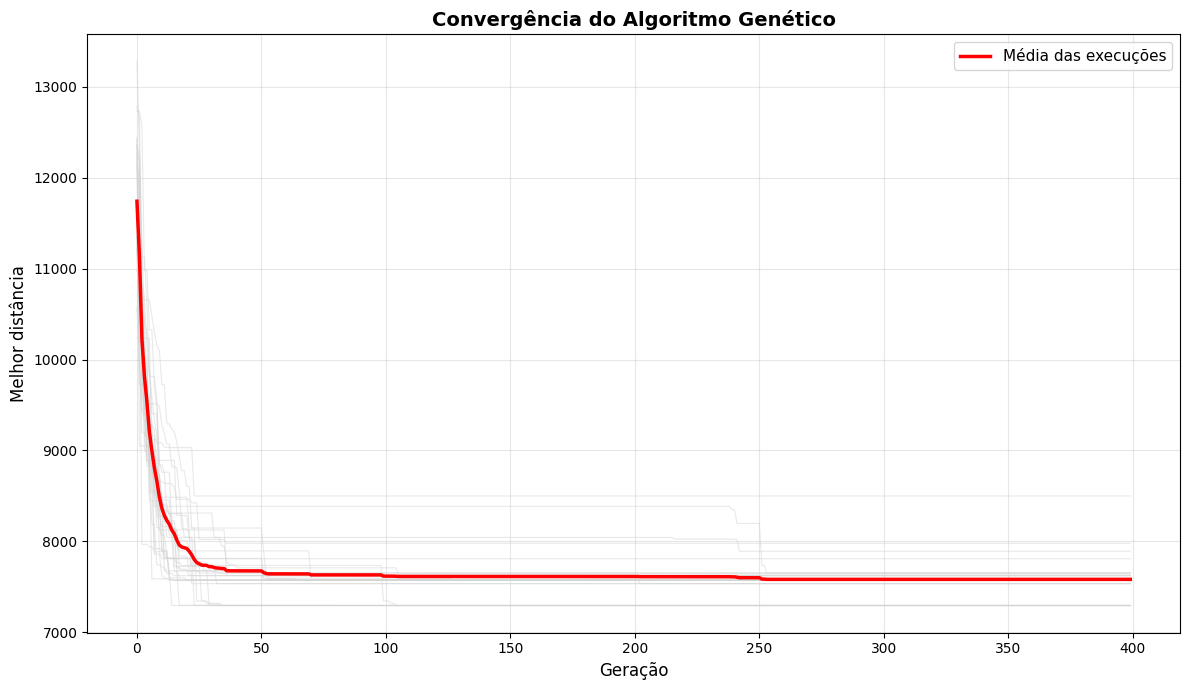


 Gráfico de convergência salvo!


In [11]:
plt.figure(figsize=(12, 7))

# Plotar todas as 30 execuções em cinza claro
for historico in todos_historicos:
    plt.plot(historico, color='lightgray', alpha=0.5, linewidth=0.8)

# Calcular e plotar a média de todas as execuções
media_historico = np.mean(todos_historicos, axis=0)
plt.plot(media_historico, color='red', linewidth=2.5, label='Média das execuções')

plt.xlabel('Geração', fontsize=12)
plt.ylabel('Melhor distância', fontsize=12)
plt.title('Convergência do Algoritmo Genético', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('grafico_convergencia_tsp.png', dpi=300, bbox_inches='tight')
plt.show()

print('\n Gráfico de convergência salvo!')

##  9. Boxplot dos Resultados Finais

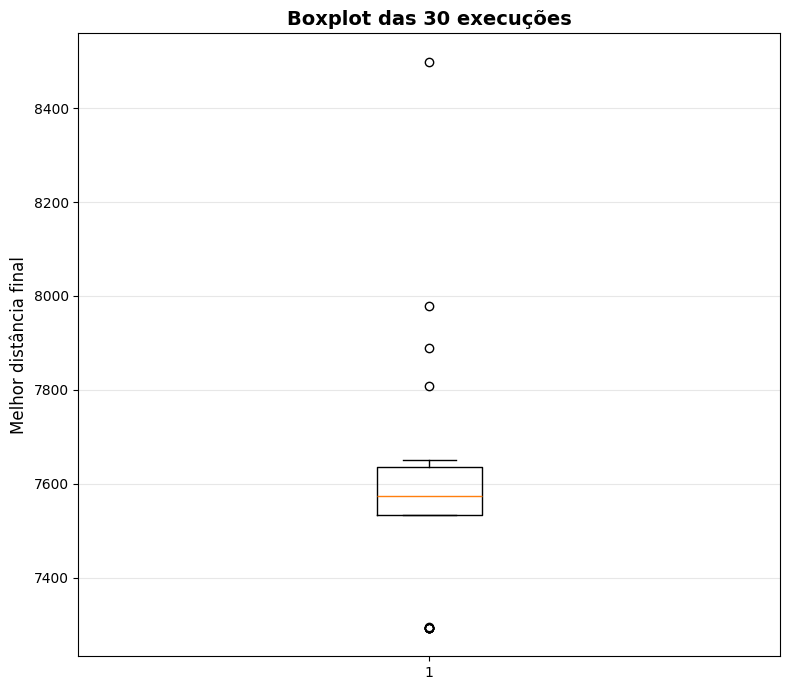


 Boxplot salvo!


In [12]:
plt.figure(figsize=(8, 7))
plt.boxplot(resultados_distancias, vert=True)
plt.ylabel('Melhor distância final', fontsize=12)
plt.title('Boxplot das 30 execuções', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('boxplot_tsp.png', dpi=300, bbox_inches='tight')
plt.show()

print('\n Boxplot salvo!')